Implementing the ID3 and C4.5 decison tree algorithms from scratch, evaluating them and comparing their performance.

In [52]:
import pandas as pd
import numpy as np
# from chefboost import Chefboost as chef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pprint

In [53]:
df = pd.read_csv('/kaggle/input/go-to-college-dataset/data.csv')
df_org = pd.read_csv('/kaggle/input/go-to-college-dataset/data.csv')

# Dataset Analysis

In [54]:
df.head(5)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [55]:
missing_values = df.isnull().sum()
print(missing_values)

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64


In [56]:
# One hot enocding 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_hot = pd.get_dummies(df)
df_scaled = pd.DataFrame(scaler.fit_transform(df_hot), columns = df_hot.columns)
df_hot.describe()

,parent_age,parent_salary,house_area,average_grades,type_school_Academic,type_school_Vocational,school_accreditation_A,school_accreditation_B,gender_Female,gender_Male,interest_Interested,interest_Less Interested,interest_Not Interested,interest_Uncertain,interest_Very Interested,residence_Rural,residence_Urban
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200,0.609000,0.391000,0.481000,0.519000,0.485000,0.515000,0.10000,0.229000,0.086000,0.2610,0.324000,0.461000,0.539000
std,3.500427,1.397546e+06,15.293346,3.378738,0.488219,0.488219,0.499889,0.499889,0.500025,0.500025,0.30015,0.420399,0.280504,0.4394,0.468234,0.498726,0.498726
min,40.000000,1.000000e+06,20.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,50.000000,4.360000e+06,64.600000,83.737500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
50%,52.000000,5.440000e+06,75.500000,85.575000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000
75%,54.000000,6.382500e+06,84.825000,88.262500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.0000,1.000000,1.000000,1.000000
max,65.000000,1.000000e+07,120.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000


In [57]:
df_scaled.head(5)

,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,type_school_Academic,type_school_Vocational,school_accreditation_A,school_accreditation_B,gender_Female,gender_Male,interest_Interested,interest_Less Interested,interest_Not Interested,interest_Uncertain,interest_Very Interested,residence_Rural,residence_Urban
0,1.083838,1.122836,0.555074,-0.594365,-1.040833,1.0,0.801272,-0.801272,1.038750,-1.038750,-0.970437,0.970437,-0.333333,1.834888,-0.306744,-0.594289,-0.692308,-0.924818,0.924818
1,1.369661,-0.695545,0.149467,0.240684,-1.040833,1.0,0.801272,-0.801272,1.038750,-1.038750,-0.970437,0.970437,-0.333333,1.834888,-0.306744,-0.594289,-0.692308,-0.924818,0.924818
2,-0.631096,0.800682,0.398065,0.394664,-1.040833,1.0,0.801272,-0.801272,-0.962695,0.962695,1.030464,-1.030464,-0.333333,-0.544993,-0.306744,-0.594289,1.444444,-0.924818,0.924818
3,-0.916918,0.872272,0.241055,-1.177715,0.960769,1.0,-1.248016,1.248016,-0.962695,0.962695,-0.970437,0.970437,-0.333333,-0.544993,-0.306744,-0.594289,1.444444,1.081294,-1.081294
4,1.369661,-0.094191,0.038251,0.205150,-1.040833,-1.0,0.801272,-0.801272,1.038750,-1.038750,1.030464,-1.030464,-0.333333,-0.544993,-0.306744,-0.594289,1.444444,-0.924818,0.924818


<Axes: >

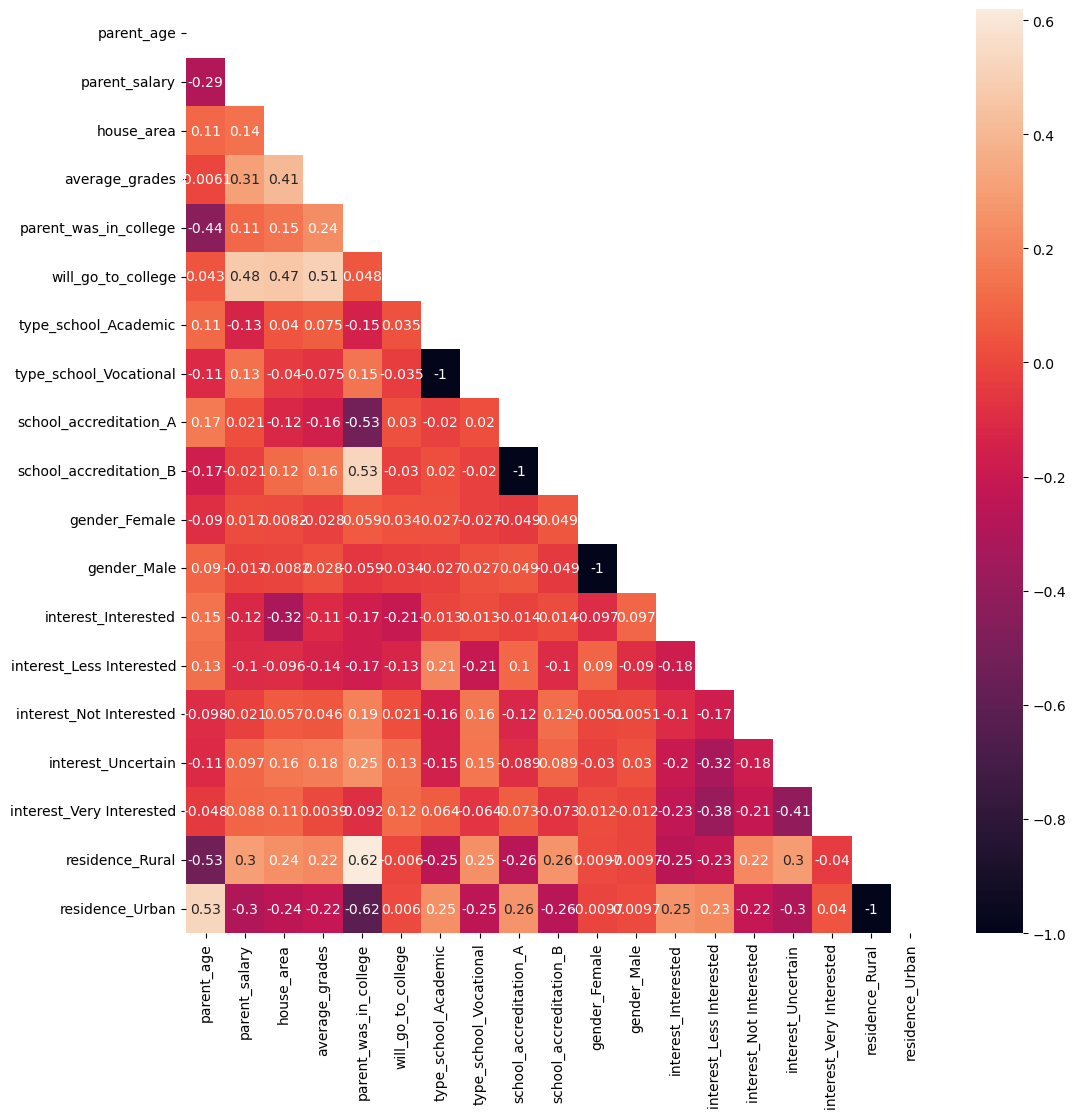

In [58]:
corr = df_hot.corr()
m = np.triu(corr)
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot= True, mask =m)

<Axes: >

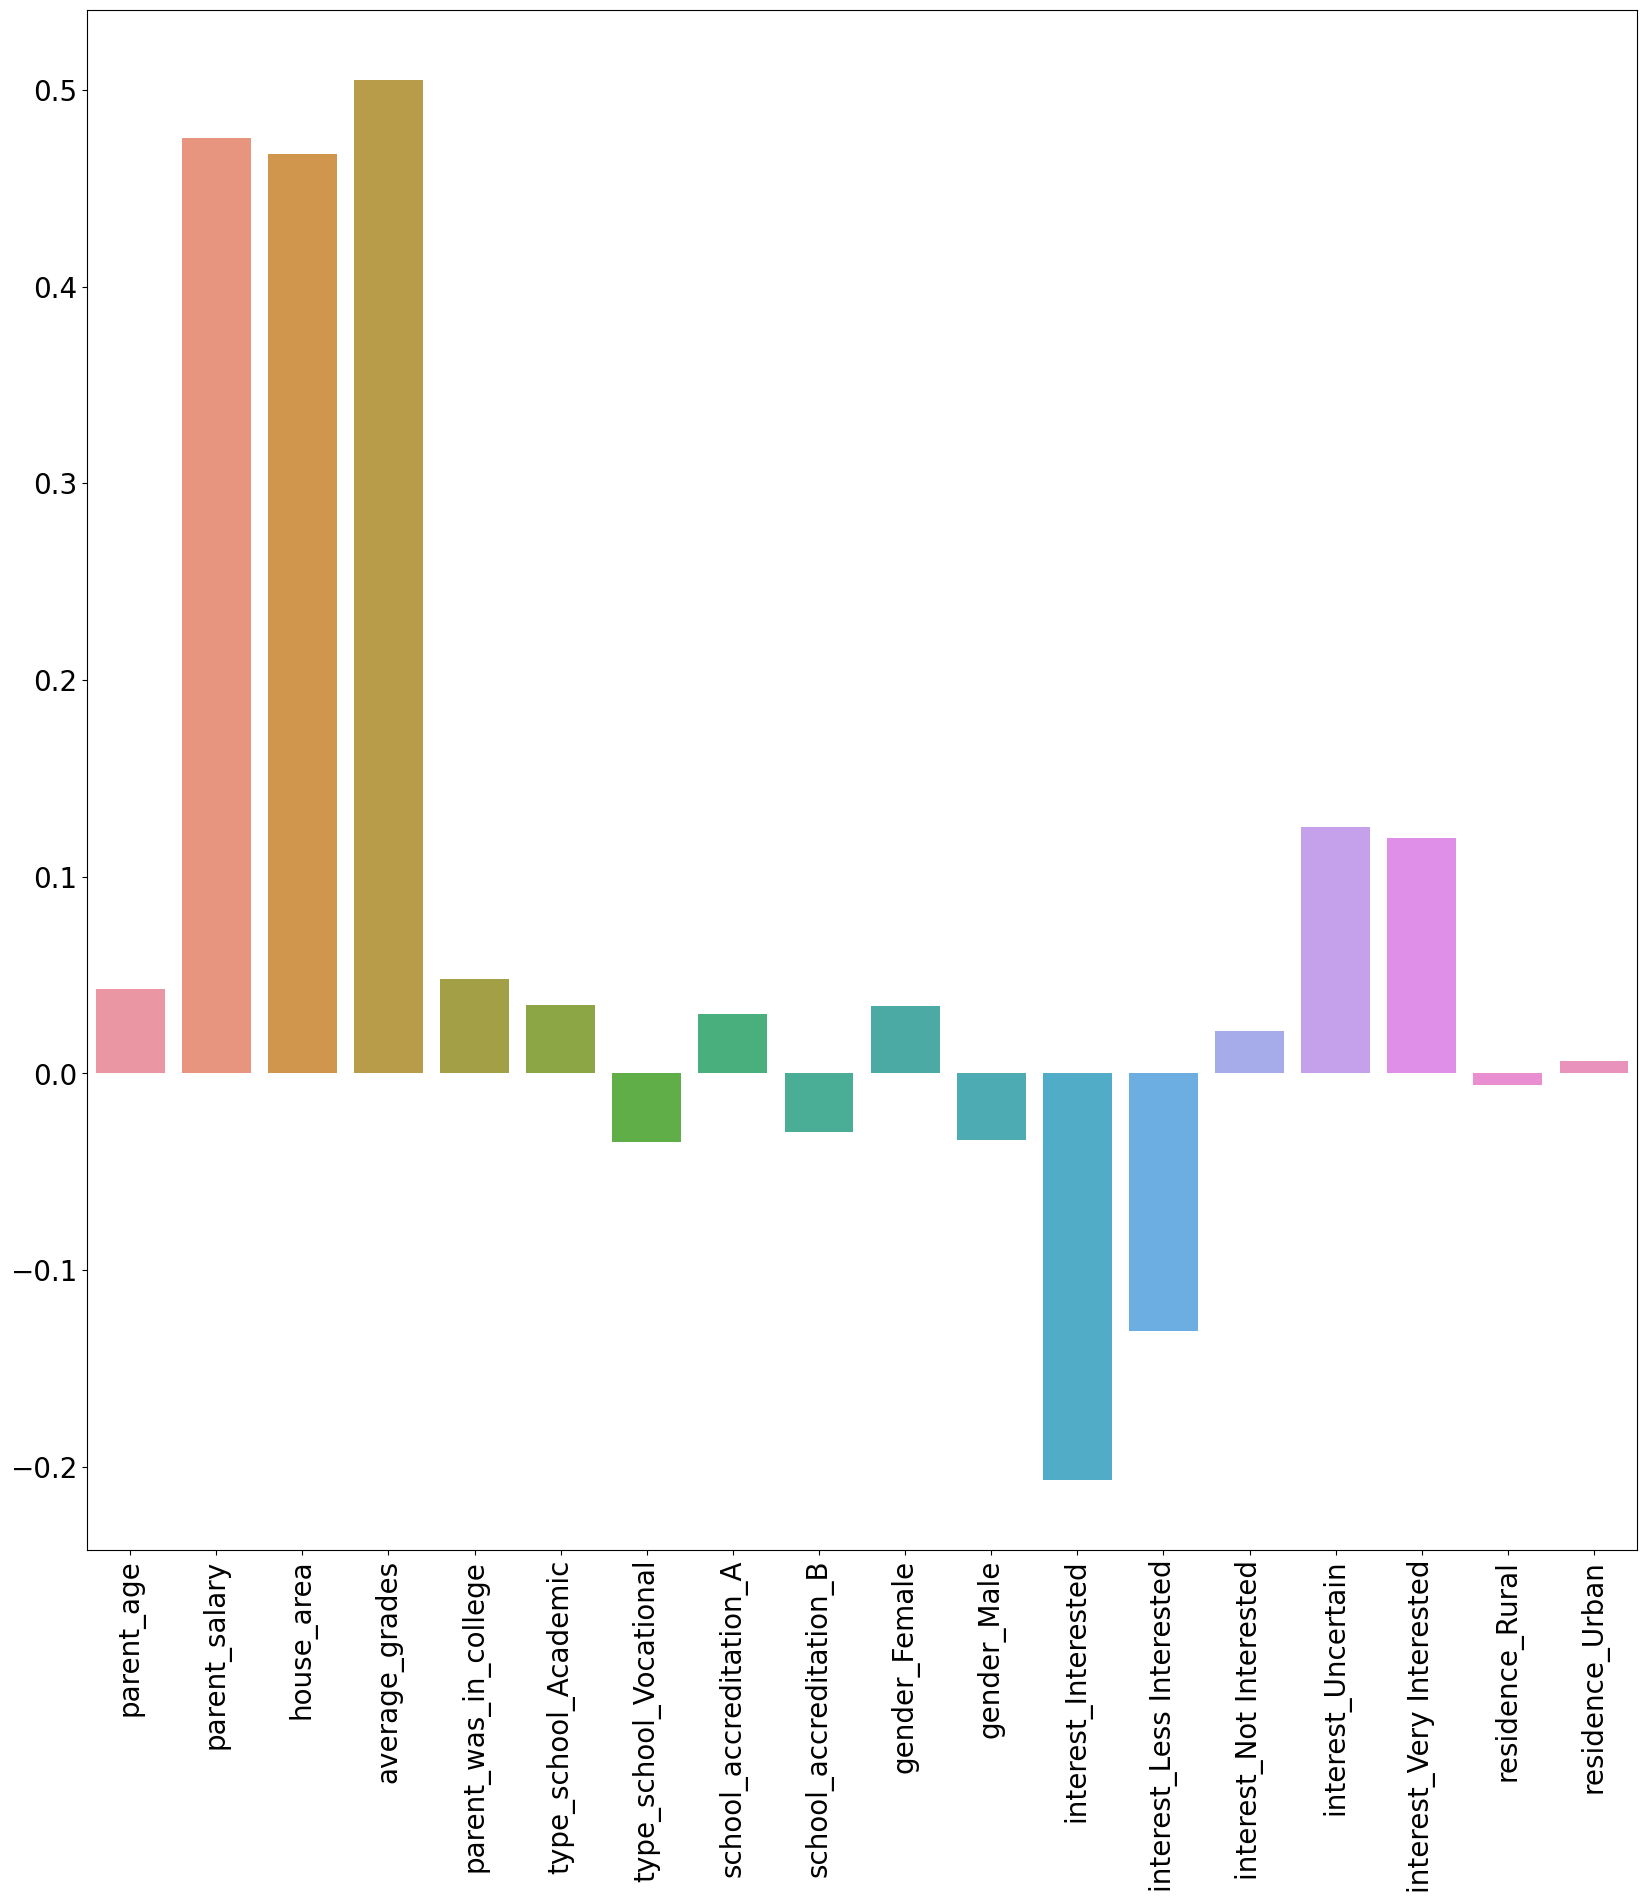

In [59]:
plt.figure(figsize= (20, 20))
plt.xticks(rotation='vertical',  fontsize =20)
plt.yticks(fontsize=20)
correlation = corr['will_go_to_college']
correlation = correlation.drop(index= 'will_go_to_college', axis =0 )
sns.barplot(x = correlation.index , y = correlation.values)

In [60]:
# Discretize all columns into 4 equal-width bins
for col in ['parent_age', 'parent_salary', 'house_area', 'average_grades']:
    df[col] = pd.cut(df[col], bins=4, labels=False)
    
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,2,2,2,1,False,True
1,Academic,A,Male,Less Interested,Urban,2,1,2,2,False,True
2,Academic,B,Female,Very Interested,Urban,1,2,2,2,False,True
3,Vocational,B,Male,Very Interested,Rural,1,2,2,1,True,True
4,Academic,A,Female,Very Interested,Urban,2,1,2,2,False,False


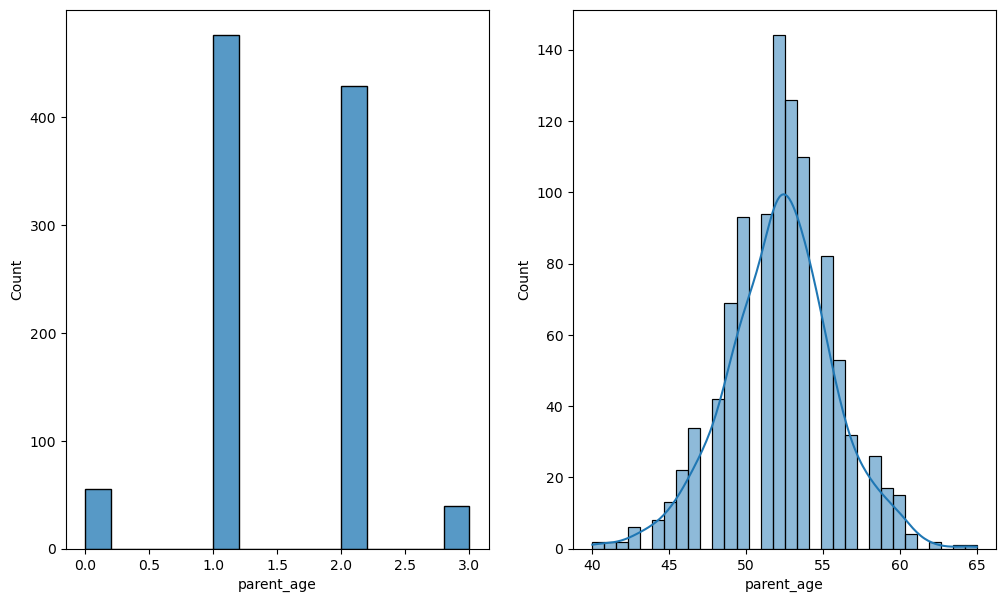

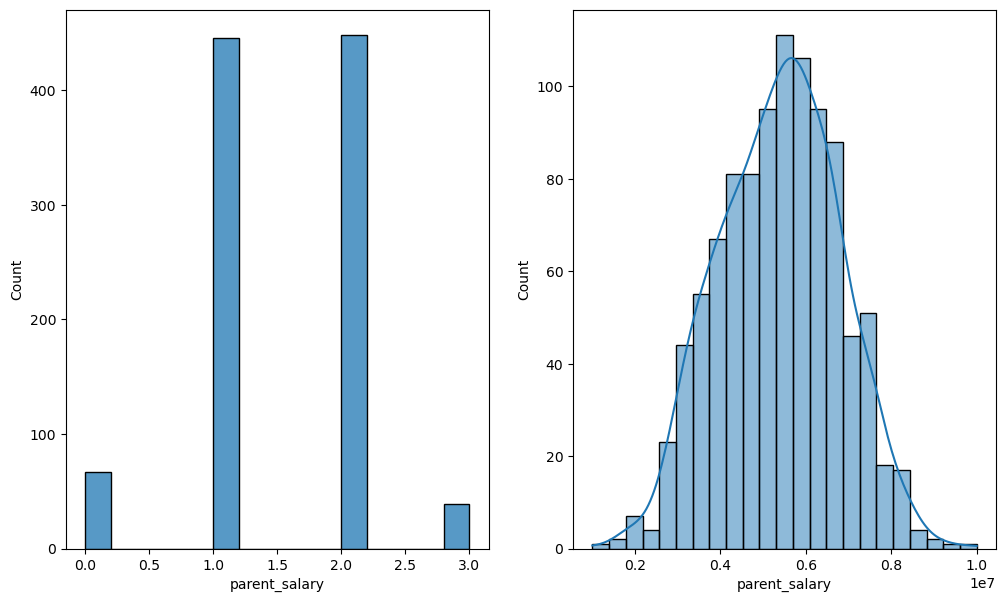

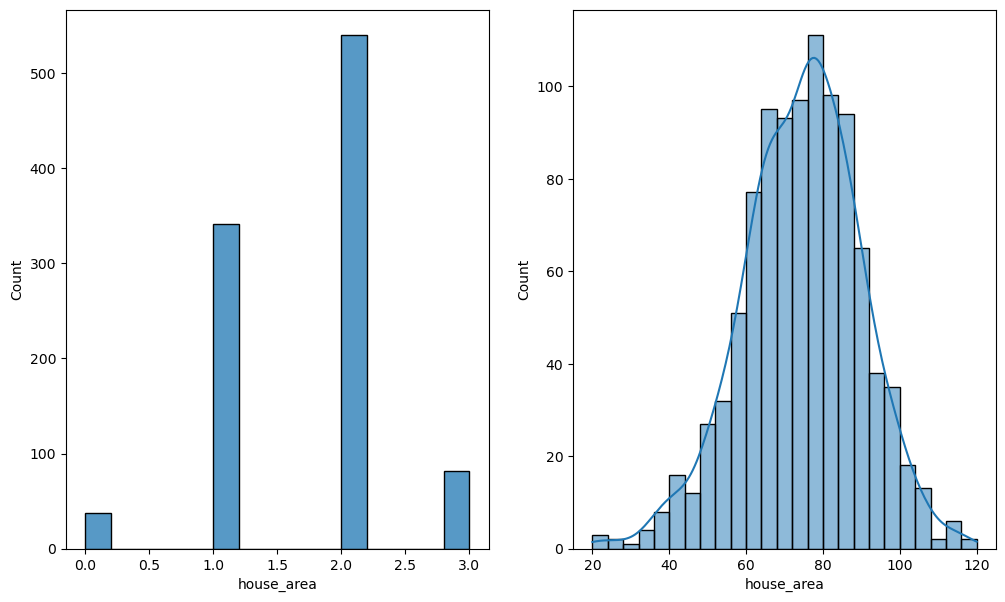

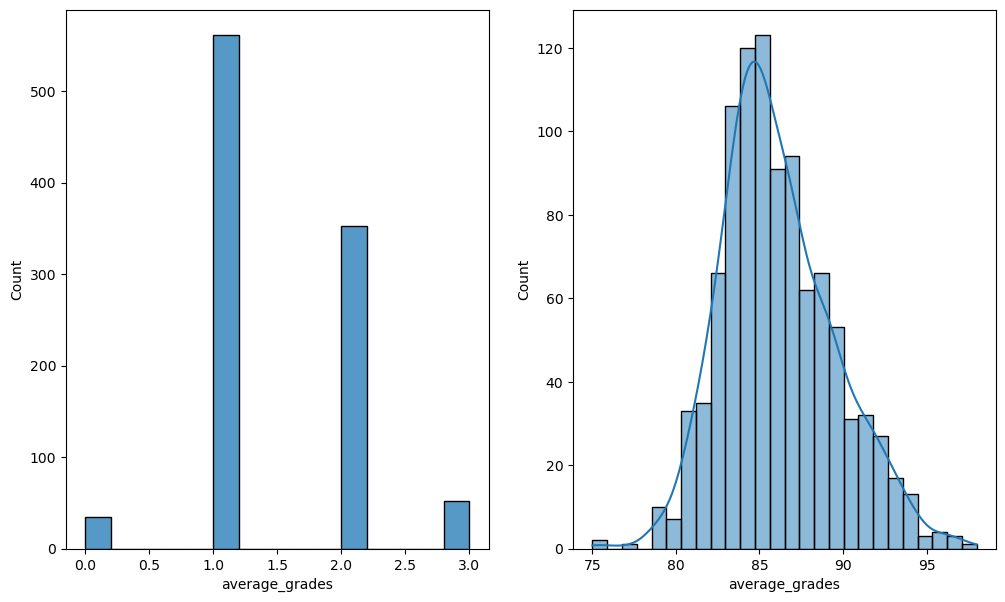

In [61]:
for col in ['parent_age', 'parent_salary', 'house_area', 'average_grades']:
    plt.figure(figsize = (12, 7))
    data = df[col]
    data2 = df_org[col]
    plt.subplot(1,2,1)
    sns.histplot(data)
    plt.subplot(1,2,2)
    sns.histplot(data2, kde=True)   
    plt.show()

# Test train Split

In [62]:
from sklearn.model_selection import train_test_split

X = df 
Y = df.iloc[:,-1 ]
train, test, _ ,_ = train_test_split(X, Y, test_size = 0.15,random_state = 78 )

print('Train lenght', len(train))
print('Test lenght', len(test))

Train lenght 850
Test lenght 150


# Implementing ID3 Tree

## Calculating parameters for split

In [63]:
#function to calculate entropy 

def entropy(data, label = 'will_go_to_college' ):
    counts = data[label].value_counts()   #return values in each catagory
    total = len(data)
    entropy = 0
    
    for value in counts:
        prob = value/ total
        entropy = entropy - prob * np.log2(prob) #at the end postivie
#     for value in df{}
    return entropy


#Calculate information gain
def cal_info_gain(data):
    base_entropy = entropy(data)
    total = len(data)
    
    info_gain =[]  #stores info gain for each attrib when a tree is splitted
    
    for column in data.columns[:-1]:
        
        attribute_values = data[column].unique()  # get each attribute value 
        new_entropy = 0.0
        
        
        for value in attribute_values:
            subset = data[data[column] == value]
            prob = len(subset)/total
            new_entropy += prob*entropy(subset)
        
        info_gain.append([column, base_entropy-new_entropy])
            
    return info_gain
    

#function check    
print(cal_info_gain(df))

[['type_school', 0.0008756968251206754], ['school_accreditation', 0.0006502498518179411], ['gender', 0.0008347905049521653], ['interest', 0.05521813009236798], ['residence', 2.6127631853833932e-05], ['parent_age', 0.007837867136231691], ['parent_salary', 0.1481582697143876], ['house_area', 0.14960114272715186], ['average_grades', 0.22919509734104793], ['parent_was_in_college', 0.0016652930806921873]]


## Tree building

In [64]:
#Recursively build the tree and store in the format {'col_name':{'split_attr':{}}

def build_tree_ID3(data, root=None):
    global split_info
    label = 'will_go_to_college'

    info_gain = cal_info_gain(data)
    info_gain = sorted(info_gain, key=lambda x: x[1], reverse=True)
    column_name = info_gain[0][0]    #best column to split on 
#     print('Col:', column_name)

    root = {column_name: {}}

    for attr in data[column_name].unique():
#         print(attr)
        new_data = data[data[column_name] == attr]
        new_data = new_data.drop(column_name, axis=1)  # Drop the column used for splitting
        
        if len(new_data.columns) < 2:  #If the data is splitted in all columns and still is impure
            count = new_data[label].value_counts() 
            count = count.sort_values(ascending=False)
            root[column_name][attr] = count.index[0]
        
        elif len(new_data) > 1 and len(new_data[label].unique()) > 1:
            new = build_tree_ID3(new_data, root)  #Recusive call for further splitting
            root[column_name][attr] = new
            
        else:
            output = new_data[label].unique()
            root[column_name][attr] = output[0]

    return root

# Implementing C4.5

## Calculating parameters for split

In [65]:
#Calculate gain
def Gain(data):
    base_entropy = entropy(data)
    total = len(data)
    
    gain =[]  #stores info gain for each attrib when a tree is splitted
    
    for column in data.columns[:-1]:
        
        attribute_values = data[column].unique()  # get each attribute value 
        new_entropy = 0.0
        
        
        for value in attribute_values:
            subset = data[data[column] == value]
            prob = len(subset)/total
            new_entropy += prob*entropy(subset)
        
        gain.append([column, base_entropy-new_entropy])
            
    return gain
    

#function check    
# print(cal_info_gain(df))

In [66]:
# implementation of c4.5

def split_info(data):
    total = len(data)
    
    split_info_ =[]  #stores info gain for each attrib when a tree is splitted
    
    for column in data.columns[:-1]:
        
        attribute_values = data[column].unique()  # get each attribute value 
        split_info_att = 0.0  #split info for an attribute
        
        
        for value in attribute_values:
            subset = data[data[column] == value]
            prob = len(subset)/total
            split_info_att -= prob * np.log2(prob)
        
        split_info_.append([column, split_info_att])
            
    return split_info_


#gainratio = gain/splitinfo
def gain_ratio(data):
    gain = Gain(data)
    splitinfo = split_info(data)
    gain = np.array(gain)
    splitinfo = np.array(splitinfo)
    
    gain_ratio_ = list()   #stores gain ratio for every attribute 
    
# #     for attr in gain[:, 0]:   #looping throuhg all attributes
# #         ratio = gain[:, 1]/split_info[:, 1]
#     try:
#         ratio = np.divide(gain[:, 1].astype(np.float64), splitinfo[:, 1].astype(np.float64))
#     except: 
#         ratio =[]
    
    for a, b in zip(gain, splitinfo):
        if float(b[1])==0:  #handaling zero cases
            ratio =0 
        else:
            ratio = float(a[1])/float(b[1])
            
        gain_ratio_.append([a[0], ratio])
        
    return gain_ratio_

## Tree Building

In [67]:
#Recursively build the tree and store in the format {'col_name':{'split_attr':{}}

split_information = []  #Only to check, how tree is splitting, testing
def build_tree_C4_5(data, root=None):
    global split_info
    label = 'will_go_to_college'

    gain_ratio_ = gain_ratio(data)
    gain_ratio_ = sorted(gain_ratio_, key=lambda x: x[1], reverse=True)
    column_name = gain_ratio_[0][0]    #best column to split on 
#     print('Col:', column_name)

    split_information.append(column_name)
    root = {column_name: {}}

    for attr in data[column_name].unique():
#         print(attr)
        new_data = data[data[column_name] == attr]
        new_data = new_data.drop(column_name, axis=1)  # Drop the column used for splitting
        
        if len(new_data.columns) < 2:  #If the data is splitted in all columns and still is impure
            count = new_data[label].value_counts() 
            count = count.sort_values(ascending=False)
            root[column_name][attr] = count.index[0]
        
        elif len(new_data) > 1 and len(new_data[label].unique()) > 1:
            new = build_tree_C4_5(new_data, root)  #Recusive call for further splitting
            root[column_name][attr] = new
            
        else:
            output = new_data[label].unique()
            root[column_name][attr] = output[0]

    return root

# Decision tree Inference

In [68]:

#Make decision using the tree 
def predict_decision_tree(data_point, decision_tree):
    node = decision_tree
    default_prediction = False
    
    while isinstance(node, dict):
        feature = list(node.keys())[0]
        value = data_point[feature]
        
        if value is None:
            return default_prediction
        
        try:
            node = node[feature][value]
        except KeyError:   #if key value is not present
            return default_prediction
        
    return node

In [69]:
#Functions for evaluation of model

#take datrame input and returns report and confusion matrix
def generate_report(data, tree):
    predictions = []
    actual = data.iloc[:, -1]
    for index, row in data.iterrows():
        row = row.drop('will_go_to_college', axis = 0)
        pre = predict_decision_tree(row, tree)
        predictions.append(pre)
    
    #generate report
    report = classification_report(actual, predictions)
    matrix = confusion_matrix(actual, predictions)
    
    return report, matrix

#plots confusion matrix
def plot_matrix(matrix):
    labels= [False, True]
    sns.heatmap(matrix, annot = True, fmt=".2f",cmap='Greens', xticklabels = labels, yticklabels = labels)
    plt.xlabel('Prediction')
    plt.ylabel('Ground Truth')
    plt.show()

# Training and Evaluation

### ID3 


Train Report

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       418
        True       0.97      0.96      0.97       432

    accuracy                           0.97       850
   macro avg       0.97      0.97      0.97       850
weighted avg       0.97      0.97      0.97       850



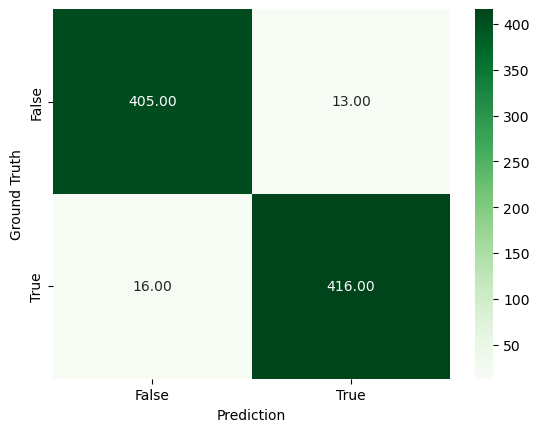


 Test Report

              precision    recall  f1-score   support

       False       0.89      0.93      0.91        82
        True       0.91      0.87      0.89        68

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



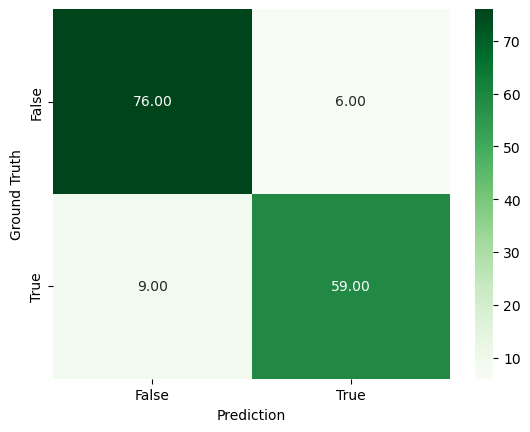

In [71]:
#Training

id3_tree = build_tree_ID3(train)

# Train report 
report, matrix = generate_report(train, id3_tree)
print('\nTrain Report\n')
print(report)
plot_matrix(matrix)


# Test report
report, matrix = generate_report(test, id3_tree)
print('\n Test Report\n')
print(report)
plot_matrix(matrix)

### C4.5


Train Report

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       418
        True       0.97      0.96      0.97       432

    accuracy                           0.97       850
   macro avg       0.97      0.97      0.97       850
weighted avg       0.97      0.97      0.97       850



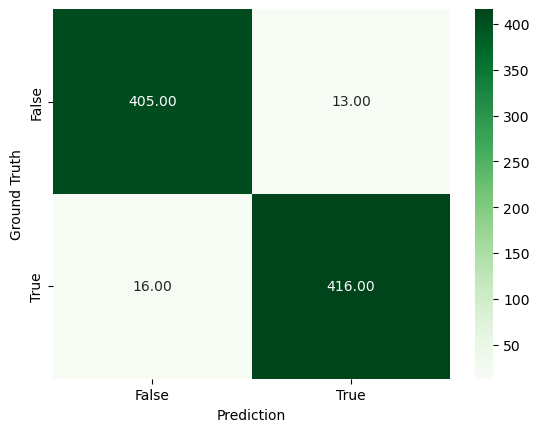


 Test Report

              precision    recall  f1-score   support

       False       0.90      0.93      0.92        82
        True       0.91      0.88      0.90        68

    accuracy                           0.91       150
   macro avg       0.91      0.90      0.91       150
weighted avg       0.91      0.91      0.91       150



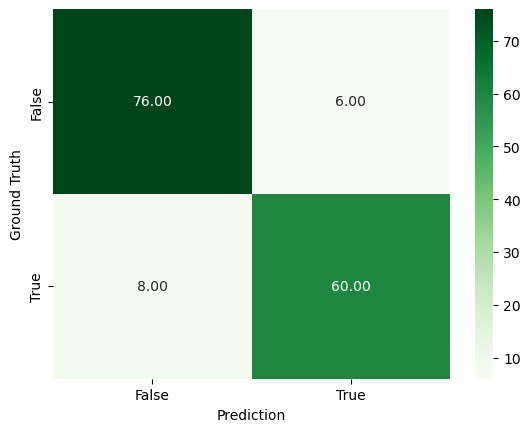

In [72]:
#Training

c4_5_tree = build_tree_C4_5(train)

# Train report 
report, matrix = generate_report(train, c4_5_tree)
print('\nTrain Report\n')
print(report)
plot_matrix(matrix)


# Test report
report, matrix = generate_report(test, c4_5_tree)
print('\n Test Report\n')
print(report)
plot_matrix(matrix)

As the dataset is small, it's causing the decision tree to perform well somtimes when the seed if perfect but is performing poorly when the seed is not good.

In [82]:
def accuracy(data, tree):
    predictions = []
    actual = data.iloc[:, -1]
    for index, row in data.iterrows():
        row = row.drop('will_go_to_college', axis = 0)
        pre = predict_decision_tree(row, tree)
        predictions.append(pre)
    
    predictions = np.array(predictions)
    accu = (predictions==actual).sum()/actual.shape[0]
    return accu
    
    

In [102]:
seed_data = []
for i in range(1, 100): 
    '''
    seed_data = ['seed', 'id3_acc', 'c4.5_acc']
    '''
    
    X = df 
    Y = df.iloc[:,-1 ]
    train, test, _ ,_ = train_test_split(X, Y, test_size = 0.1,random_state = i )
    
    id3_tree = build_tree_ID3(train)
    c4_5_tree = build_tree_C4_5(train)
    
    accu_id3 = accuracy(test, id3_tree)
    accu_c4 = accuracy(test, c4_5_tree)
    seed_data.append([i, accu_id3,accu_c4 ])
    
    


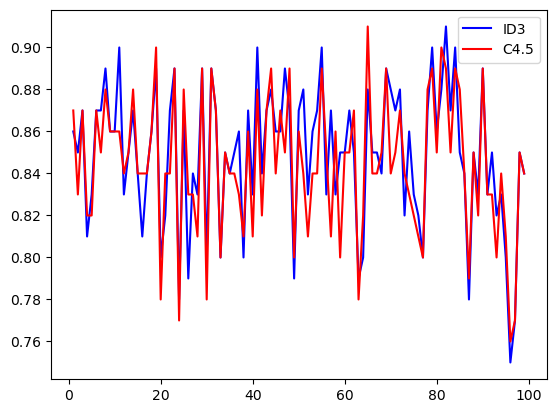

In [103]:
seed_data = np.array(seed_data)
plt.plot(seed_data[:, 0], seed_data[:, 1], color = 'blue')
plt.plot(seed_data[:, 0], seed_data[:, 2], color = 'red')
plt.legend(['ID3', 'C4.5'])
plt.show()


In [106]:
 seed_data[:, 1].mean(),  seed_data[:, 2].mean()

(0.848989898989899, 0.8444444444444442)

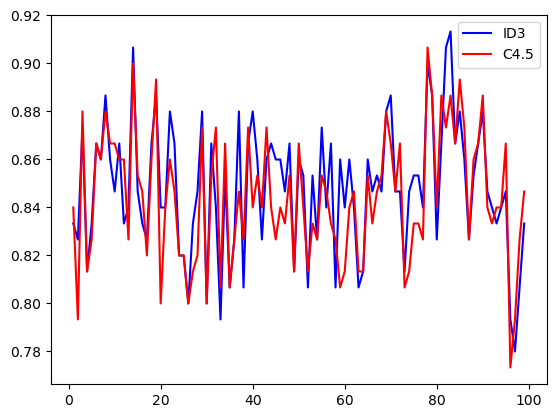

In [99]:

plt.plot(seed_data[:, 0], seed_data[:, 1], color = 'blue')
plt.plot(seed_data[:, 0], seed_data[:, 2], color = 'red')
plt.legend(['ID3', 'C4.5'])
plt.show()


In [104]:
 seed_data[:, 1].mean()
    

0.848989898989899

In [105]:
 seed_data[:, 2].mean()

0.8444444444444442